In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

In [2]:
data = fetch_20newsgroups()

In [3]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
train = fetch_20newsgroups(subset='train', categories = categories)

In [6]:
test = fetch_20newsgroups(subset='test', categories = categories)

In [7]:
train.data[5]

'From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\nSubject: Re: Rewording the Second Amendment (ideas)\nOrganization: VTT\nLines: 58\n\nIn article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:\n>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:\n>\n>> >> The massive destructive power of many modern weapons, makes the\n>> >> cost of an accidental or crimial usage of these weapons to great.\n>> >> The weapons of mass destruction need to be in the control of\n>> >> the government only.  Individual access would result in the\n>> >> needless deaths of millions.  This makes the right of the people\n>> >> to keep and bear many modern weapons non-existant.\n\n>> >Thanks for stating where you\'re coming from.  Needless to s

In [8]:
test.data[5]

'From: banschbach@vms.ocom.okstate.edu\nSubject: Re: Candida(yeast) Bloom, Fact or Fiction\nOrganization: OSU College of Osteopathic Medicine\nLines: 91\nNntp-Posting-Host: vms.ocom.okstate.edu\n\nIn article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:\n> \n> In a previous article, banschbach@vms.ocom.okstate.edu () says:\n>>least a few "enlightened" physicians practicing in the U.S.  It\'s really \n>>too bad that most U.S. medical schools don\'t cover nutrition because if \n>>they did, candida would not be viewed as a non-disease by so many in the \n>>medical profession.\n> \n> Case Western Reserve Med School teaches nutrition in its own section as\n> well as covering it in other sections as they apply (i.e. B12\n> deficiency in neuro as a cause of neuropathy, B12 deficiency in\n> hematology as a cause of megaloblastic anemia), yet I sill\n> hold the viewpoint of mainstream medicine:  candida can cause\n> mucocutaneous candidiasis, and, in already

In [9]:
#import neccesary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
#make model using naive bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(32.99999999999999, 0.5, 'Predicted label : ')

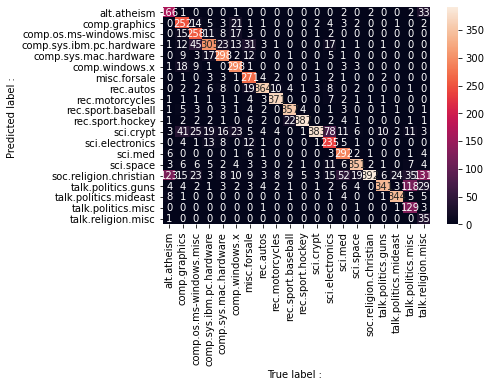

In [10]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T,annot=True,
    cbar=True,
    fmt='d',
    square=False,
    xticklabels=train.target_names,
    yticklabels=train.target_names)
plt.xlabel('True label : ')
plt.ylabel('Predicted label : ')

In [11]:
#predicting category on new data on our trained model
def predc(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]    

In [12]:
predc("I don't like baseball")

'rec.sport.baseball'

In [13]:
predc('BMW is better than Audi.')

'rec.autos'

In [14]:
predc('Jesus')

'soc.religion.christian'

In [15]:
pred = model.predict(test.data)

In [16]:
score = accuracy_score(test.target, pred)
score

0.7738980350504514